In [17]:
#P13, Exercise 
library(dplyr)
data <- read.csv("C:/Users/pengu/Documents/msleep_ggplot2.csv")

#1
class(data)

#2
data_sub2 <- filter(data,order=="Primates")
nrow(data_sub2)

#3
class(data_sub2)

#4
data_sub3 <- (filter(data,order=="Primates") %>% select(sleep_total))
class(data_sub3)

#5
mean(unlist(data_sub3))

#6
filter(data,order=="Primates") %>% summarise(mean=mean(sleep_total))

[1] "data.frame"

[1] 12

[1] "data.frame"

[1] "data.frame"

[1] 10.5

mean
10.5


Warning message:
"package 'downloader' was built under R version 3.4.4"

[1] 0.028

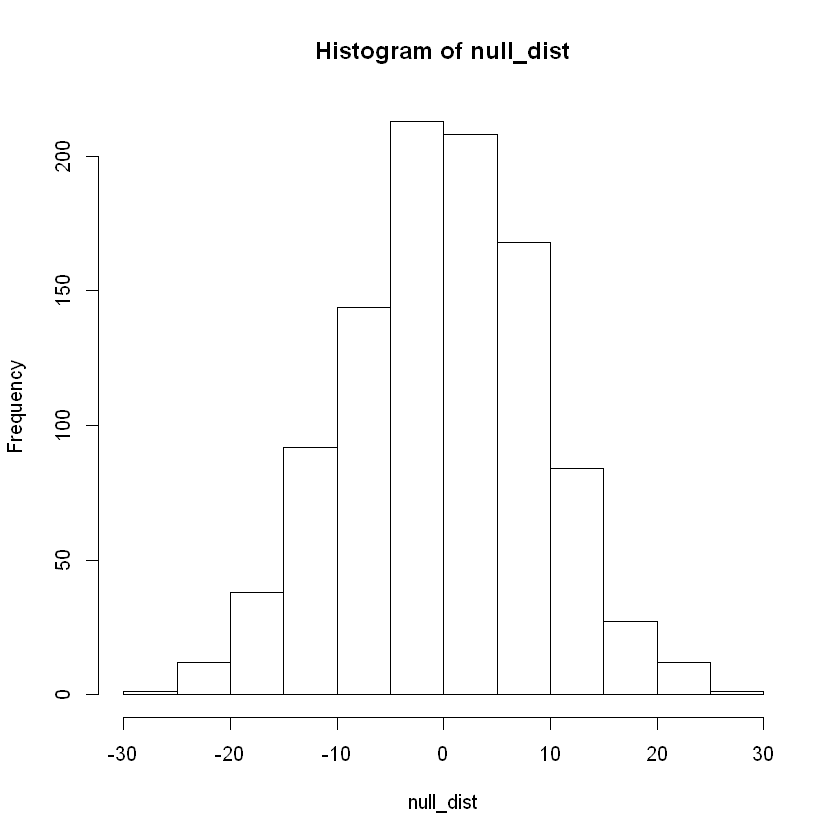

In [18]:
#P85, Exersises
library(downloader)
url <- "https://raw.githubusercontent.com/genomicsclass/dagdata/master/inst/extd\
ata/babies.txt"
filename <- basename(url)
download(url, destfile=filename)
babies <- read.table("babies.txt", header=TRUE)
bwt.nonsmoke <- filter(babies, smoke==0) %>% select(bwt) %>% unlist
bwt.smoke <- filter(babies, smoke==1) %>% select(bwt) %>% unlist

#the difference of mean value
N=10
set.seed(1)
nonsmokers <- sample(bwt.nonsmoke , N)
smokers <- sample(bwt.smoke , N)
obs <- mean(smokers) - mean(nonsmokers)
obs_median <-  median(smokers)-median(nonsmokers)

#Permutation and calculate null distribution
num <- 1000
null_dist <- rep(NA,num)
for(i in 1:num){
  dat <- c(smokers,nonsmokers)
  shuffle <- sample( dat )
  smokersstar <- shuffle[1:N]
  nonsmokersstar <- shuffle[(N+1):(2*N)]
  null_dist[i] <- mean(smokersstar)-mean(nonsmokersstar)
}
hist(null_dist)

#Calculate p value of  one-sided test
sum(obs>null_dist)/num


[1] 0.007

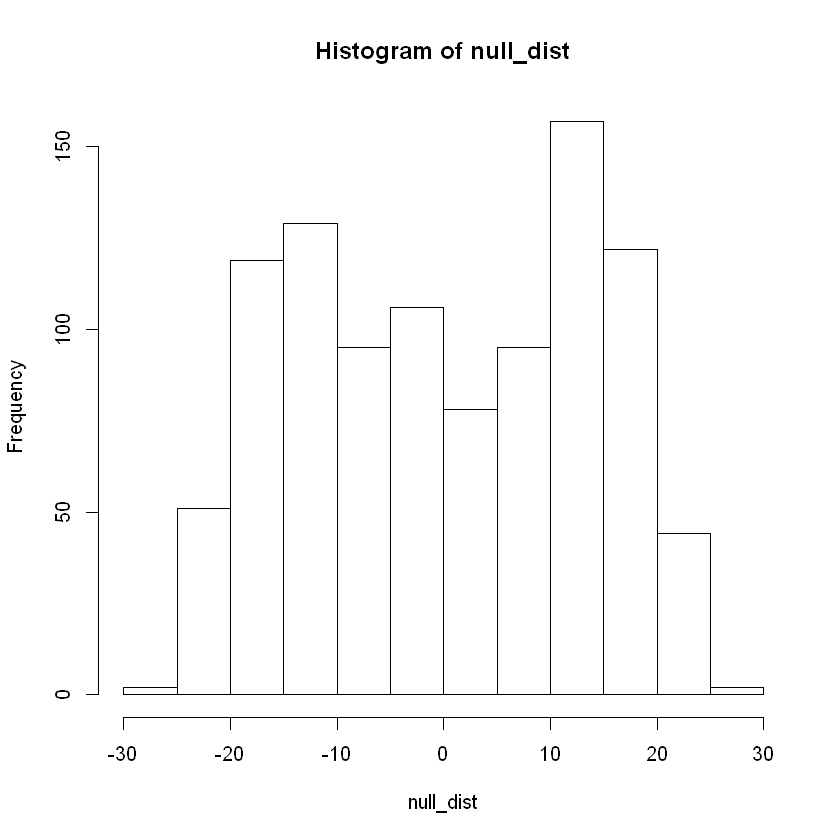

In [19]:
#In the case of median value
num <- 1000
null_dist <- rep(NA,num)
for(i in 1:num){
  dat <- c(smokers,nonsmokers)
  shuffle <- sample( dat )
  smokersstar <- shuffle[1:N]
  nonsmokersstar <- shuffle[(N+1):(2*N)]
  null_dist[i] <- median(smokersstar)-median(nonsmokersstar)
}
hist(null_dist)

#Calculate p value of  one-sided test
sum(obs_median>null_dist)/num